# **STOCK ANALYSIS**

## 1. Connecting To  GDrive

Please Note: Please ignore this step if you are running your code on the local machine.

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive/', force_remount=True)
# %cd gdrive/My Drive/StockAnalysis/Src

## 2. Installing Libraries

In [2]:
# --- INSTALL ALL THE PACAKGES WE NEED HERE 

!pip install selenium
!pip install yfinance
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!pip install html2text
!pip install fbprophet

# -- COPY THE INSTALLED VERSION 

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver');

  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

## 3. Importing Libraries

In [3]:
# install & import our packages

import os
import json 
import requests
import base64
import time
import urllib.request
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import re 

import plotly.graph_objs as go
import yfinance as yf
import pandas as pd
import html2text
import re
from textblob import TextBlob

df_path = "../Data/company_news.csv"

ticker = "GOOG"

In [4]:
# --- IMPORT THE SELENIUM LIBRARY 
from selenium import webdriver
# --- SET UP CHROME OPTIONS
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
# --- SET UP THE WEB DRIVER
driver = webdriver.Chrome('chromedriver',options=chrome_options)

## 4. Web Scrapping

In [5]:
# we simply hard coded the days into the URL
day = '03'
month = '11'
year = '2021'
hour = '00'

BASE_LINK = "https://www.prnewswire.com/news-releases/news-releases-list/?&pagesize=25&month="+month+"&day="+day+"&year="+year+"&hour="+hour+"&page="

# define start page number
page = 1

news_df = pd.DataFrame(columns= ['news_text', 'title', 'date', 'author'])

while page <=10: 

    # get the page details
    driver.get(BASE_LINK + str(page))

    # wait a lil bit till the page loads completely
    time.sleep(3)

    # -- COMMENTED CODE BELOW IS FOR ACTUALLY CLICKING ON THE BUTTONS BUT WE DON'T NEED THAT ANY MORE

    # # get the datepicker element
    date_picker= driver.find_element_by_css_selector('input#date')

    # #  change date to 2 weeks from today; today is the 17th so 2 weeks ago is the 03/11/2021, no need to over complicate things
    driver.execute_script("arguments[0].value = arguments[1]",date_picker, "03/11/2021")

    # # get the time picker element
    # time_picker = driver.find_element_by_css_selector('span#filter-option')

    # # change the value of the time picker to 03:00
    # driver.execute_script('arguments[0].innerHTML = arguments[1]', time_picker, "03:00")

    # # now click on the go button to generate the data
    # driver.find_element_by_css_selector('button#GoButton').click()

    # Get all the news for this page
    news = driver.find_elements_by_css_selector('a.newsreleaseconsolidatelink')
    news_links = []
    # get all the links and store in a seperate array 
    for link in news: 
        news_links.append(link.get_attribute('href'))
    # loop through articles and print them out/ store them in csv file
    for news_link in news_links: 
        # go to the link to the full article
        driver.get(news_link); 
        # wait for a few seconds for the page to load
        time.sleep(2)

        # get the author, title, date and full tet
        author = driver.find_element_by_xpath("//meta[@name='author']").get_attribute("content")
        title = driver.title
        date = driver.find_element_by_xpath("//meta[@name='date']").get_attribute("content")

        # then scrape everything from this page
        full_text = driver.find_elements_by_tag_name('p')
        
        news_df = news_df.append({
            'title':title,
            'date':date,
            'author': author,
            'news_text': ' '.join([str(texts.get_attribute('innerHTML')) for texts in full_text])
        }, ignore_index=True)
        pprint(news_df.news_text)
    # Change page number
    page += 1
# close driver
driver.close
try:
  news_df.to_csv(df_path)
  # New DF
except:
  pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning:

find_element_by_* commands are deprecated. Please use find_element() instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning:

find_elements_by_* commands are deprecated. Please use find_elements() instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning:

find_element_by_* commands are deprecated. Please use find_element() instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning:

find_element_by_* commands are deprecated. Please use find_element() instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning:

find_elements_by_* commands are deprecated. Please use find_elements() instead



0    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for your content... \nIn-Language Ne...
1    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for your content... \nIn-Language Ne...
1    Searching for your content... \nIn-Language Ne...
2    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for your content... \nIn-Language Ne...
1    Searching for your content... \nIn-Language Ne...
2    Searching for your content... \nIn-Language Ne...
3    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for your content... \nIn-Language Ne...
1    Searching for your content... \nIn-Language Ne...
2    Searching for your content... \nIn-Language Ne...
3    Searching for your content... \nIn-Language Ne...
4    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for y

In [6]:
news_df.shape

(250, 4)

## 5. Pulling Stock Prices

In [7]:
#code for getting the stock data for Microsoft Corporation

import yfinance as yf 
  
data = yf.Ticker("MSFT")

# get stock info
print(data.info)

# get historical market data
hist = data.history(period="1mo")

{'zip': '98052-6399', 'sector': 'Technology', 'fullTimeEmployees': 181000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certificatio

In [8]:
 #Importing the data values into the dataframe
MSFT_Stock = pd.DataFrame(hist)
MSFT_Stock 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-17,338.940002,342.190002,338.000000,339.119995,19053400,0.62,0
2021-11-18,338.179993,342.450012,337.119995,341.269989,22463500,0.00,0
2021-11-19,342.640015,345.100006,342.200012,343.109985,21963400,0.00,0
2021-11-22,344.619995,349.670013,339.549988,339.829987,31031100,0.00,0
2021-11-23,337.049988,339.450012,333.559998,337.679993,30427600,0.00,0
2021-11-24,336.279999,338.160004,333.910004,337.910004,21661300,0.00,0
2021-11-26,334.350006,337.929993,328.119995,329.679993,24217200,0.00,0
2021-11-29,334.940002,339.029999,334.739990,336.630005,28563500,0.00,0
2021-11-30,335.320007,337.779999,328.989990,330.589996,42885600,0.00,0


In [9]:
!pip install plotly

In [10]:
import plotly.express as px

fig = px.scatter(MSFT_Stock, x=MSFT_Stock['Close'], y=MSFT_Stock['Volume'])
fig.update_layout(title='Close Rate of Stock Price Vs Volume')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



                  Open        High  ...  Dividends  Stock Splits
Date                                ...                         
2021-11-17  338.940002  342.190002  ...       0.62             0
2021-11-18  338.179993  342.450012  ...       0.00             0
2021-11-19  342.640015  345.100006  ...       0.00             0
2021-11-22  344.619995  349.670013  ...       0.00             0
2021-11-23  337.049988  339.450012  ...       0.00             0

[5 rows x 7 columns]


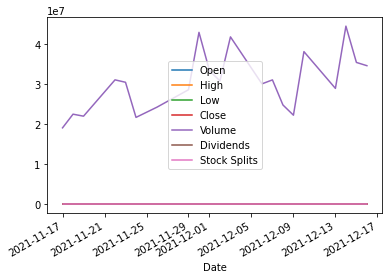

In [11]:

# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = MSFT_Stock
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

In [12]:
#Stock Price Trend forcasting.
y = MSFT_Stock['Close']                            #Assigning y vairable = close price. 
x = MSFT_Stock[['Open', 'High', 'Low', 'Volume']]  #Assigning x variable to stock features; Open, High, Low, Volume. 

## 6. Visualization

### 6.1 Loading Dataframe

In [13]:
try:
  df = pd.read_csv(df_path)
except:
  df = news_df


#df.drop([df.columns[0]], axis=1,inplace=True)
df.sample(5)

,news_text,title,date,author
32,Searching for your content... \nIn-Language Ne...,SecondLive Raises at $30M Valuation in the See...,2021-11-02T21:00:00-04:00,Binance Smart Chain
226,Searching for your content... \nIn-Language Ne...,Eaton Vance Municipal Income 2028 Term Trust A...,2021-11-02T16:01:00-04:00,Eaton Vance Management
75,Searching for your content... \nIn-Language Ne...,Consumer Watchdog Debuts Digital Ofrenda (Alta...,2021-11-02T19:04:00-04:00,Consumer Watchdog
240,Searching for your content... \nIn-Language Ne...,Florida Governors Spotlighted In Next Florida ...,2021-11-02T15:51:00-04:00,Florida Southern College
133,Searching for your content... \nIn-Language Ne...,Markel Reports 2021 Third Quarter and Nine-Mon...,2021-11-02T16:44:00-04:00,Markel Corporation


### 6.2 Pre Processing

In [14]:
df.news_text = df.news_text.apply(lambda text: re.sub(r'http\S+', '', html2text.html2text(text[508:])))
df.sample(5)

,news_text,title,date,author
227,"l"" href=""#financial-modal"">GPK), (« Graphic Pa...",Graphic Packaging Holding Company annonce la c...,2021-11-02T16:01:00-04:00,Graphic Packaging Holding Company
30,"d, Karen Civil, and other prominent industry l...","7th Ave, Inc. Raises $2.5M Seed Round led by M...",2021-11-02T21:15:00-04:00,7th Ave
179,"by Nov 02, 2021, 16:15 ET Share this article C...",Chatham Asset Management Updates Stockholders ...,2021-11-02T16:15:00-04:00,"Chatham Asset Management, LLC"
191,"""#financial-modal"">SMLP) (the ""Partnership"") a...","Summit Midstream Partners, LP Announces Closin...",2021-11-02T16:05:00-04:00,"Summit Midstream Partners, LP"
233,"603&u=\nrel=""nofollow"" target=""_blank"">Mitsubi...",Mitsubishi Logisnext Americas Group Launches N...,2021-11-02T16:00:00-04:00,Mitsubishi Logisnext Americas


In [15]:
# We are usinng the following stocks for analaysis: Samsung (KRW) |Microsoft  (MSFT)| Mazda (JPY)
ticker_dict = df.news_text.str.extract(r"(MSFT|JPY|KRX)").value_counts().keys()
ticker_list = list(ticker_dict)
ticker_list = [ticker[0] for ticker in ticker_list]

ticker_list

['JPY', 'MSFT', 'KRX']

### 6.3 Sentiment Analysis

In [16]:
df["sentiment_score"] = df["news_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["sentiment_score"] = df["sentiment_score"].apply(lambda x: "Positive" if x >= 0.15 else "Negative")
df.sample(5)

,news_text,title,date,author,sentiment_score
235,1 г. /PRNewswire/ -- Компания Winner Medical (...,Winner Medical представит свои инновационные р...,2021-11-02T16:00:00-04:00,"Winner Medical Co., Ltd.",Negative
226,pal Income 2028 Term Trust (NYSE: ETX): **Noti...,Eaton Vance Municipal Income 2028 Term Trust A...,2021-11-02T16:01:00-04:00,Eaton Vance Management,Negative
110,search-report-by-\ntype?utm_source=CI&utm_medi...,Worldwide Facade Systems Industry to 2026 - In...,2021-11-02T17:30:00-04:00,Research and Markets,Negative
90,"Kahn Swick & Foti, LLC (""KSF"") are investigati...",ADAMAS PHARMACEUTICALS INVESTOR ALERT BY THE F...,2021-11-02T18:30:00-04:00,"Kahn Swick & Foti, LLC",Positive
96,"the Issuer announce, further to the announceme...","Seadrill New Finance Limited (the ""Issuer"") - ...",2021-11-02T18:22:00-04:00,Seadrill Limited,Negative


In [17]:
df.sentiment_score.value_counts()

Negative    177
Positive     73
Name: sentiment_score, dtype: int64

### 6.4 Plotting 

In [18]:
ticker = ticker_list[1]
print("Ticker",ticker )
processed_df = df[df.news_text.str.contains(ticker)]
processed_df

Ticker MSFT


,news_text,title,date,author,sentiment_score
0,bsp;2021 /PRNewswire/ -- The AES Corporation (...,Microsoft and AES Partner to Bring Around-the-...,2021-11-02T23:58:00-04:00,The AES Corporation,Negative


In [19]:
processed_df.set_index(['date'], inplace=True)
start_date = min(processed_df.index)[:10]
end_date = max(processed_df.index)[:10]

In [20]:

data = yf.download(
                       ticker,
                       period = '2mo',
                       interval = '1h',
                       prepost = True
                  )



fig = go.Figure()

fig.add_trace(
                go.Candlestick(
                                   x=data.index,
                                   open = data['Open'],     
                                   high=data['High'],
                                   low=data['Low'], 
                                   close=data['Close'],
                                   name = 'market data'
                              )
             )

fig.add_trace(
              go.Scatter(
                          x=processed_df.index,
                          y=data.Low,
                          mode='markers',
                          text = "<b>Publication</b>: " + processed_df["author"].astype(str) + "<br><b>Title:</b> " + processed_df["title"].astype(str) + "<br><b>Polarity:</b> " + processed_df["sentiment_score"],
                        # marker =dict(symbol='triangle-down', size = 3)
                         )
            )

fig.update_layout(title = ticker + ' share price', yaxis_title = 'Stock Price (USD)')

fig.show(); 

[*********************100%***********************]  1 of 1 completed


## 7. Predicting Using LSTM.

In [22]:
#Impoorting Modules for Stock Forcasting 
import yfinance as yf
from datetime import date
from fbprophet import Prophet
from fbprophet.plot import plot_plotly 
from plotly import graph_objects as go 
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

microsoft = yf.Ticker('MSFT')  

In [23]:
# fetching stock data from yahoo

data = yf.Ticker("MSFT")

# get stock info
print(data.info)

# get historical market data
hist = data.history(period="12mo")
df = pd.DataFrame(hist)
df.reset_index(drop=False, inplace=True)

{'zip': '98052-6399', 'sector': 'Technology', 'fullTimeEmployees': 181000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certificatio

In [24]:
#Setting Parameters.
microsoft_df = microsoft.history(period="12mo")
microsoft_df = microsoft_df.reset_index()

#Changing column names to ds and y as required by FbProphet.  
df_train = microsoft_df[['Date', 'Close']]
df_train = df_train.rename(columns = {'Date': 'ds', 'Close': 'y' })
df_train.head()

,ds,y
0,2020-12-17,217.596039
1,2020-12-18,216.772934
2,2020-12-21,220.739685
3,2020-12-22,222.078461
4,2020-12-23,219.182724


In [25]:
# Sort the dataset on date time and filter “Date” and “Close” columns
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

new_dataset.head()

,Date,Close
0,2020-12-17 00:00:00,217.596
1,2020-12-18 00:00:00,216.773
2,2020-12-21 00:00:00,220.74
3,2020-12-22 00:00:00,222.078
4,2020-12-23 00:00:00,219.183


In [26]:
#Predicting price for next 6 months days
m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods= 180)
forcast = m.predict(future)
plot_plotly(m, forcast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


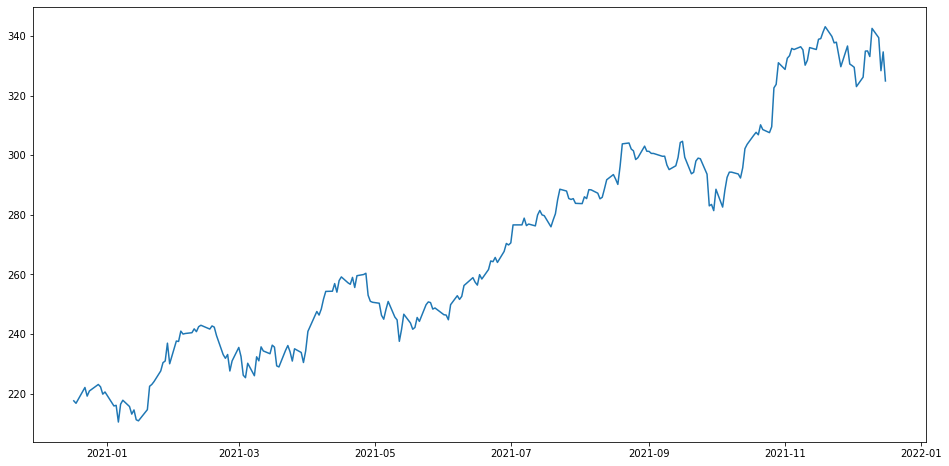

In [27]:
# Analyze the closing prices from dataframe

df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [28]:
# Normalize the new filtered dataset
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
predict = int(len(final_dataset) / 10)
train_data=final_dataset[0:(len(final_dataset) - predict),:]
valid_data=final_dataset[(len(final_dataset) - predict):,:]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [29]:
# Build and train the LSTM model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



167/167 - 7s - loss: 0.0103 - 7s/epoch - 41ms/step


In [30]:
# Take a sample of a dataset to make stock price predictions using the LSTM model:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



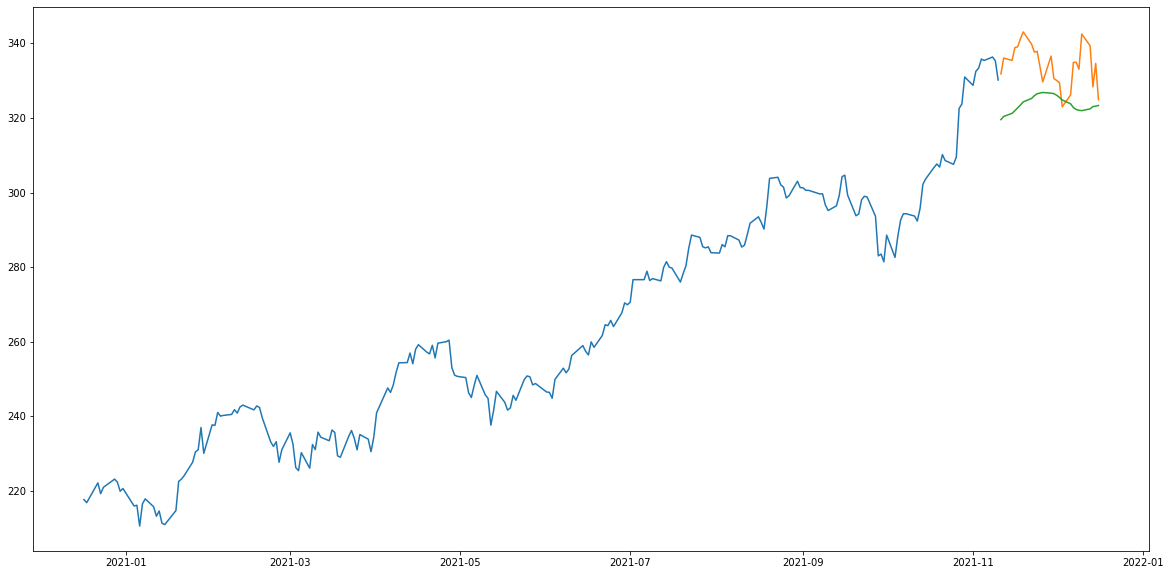

In [31]:
# Visualize the predicted stock costs with actual stock costs 
train_data=new_dataset[:(len(final_dataset) - predict)]
valid_data=new_dataset[(len(final_dataset) - predict):]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

## 8. Using Twitter

Please note: We have removed the twitter authentication keys before the submission, re running these cells might trigger an authentication error. Thank you.

In [21]:
import json 
import tweepy
import os
import requests
import pandas as pd
import plotly.graph_objs as go
from textblob import TextBlob

twitter_key_path = "../Keys/twitter_keys.json" 

with open(twitter_key_path, "r") as handle:
    twitter_keys = json.load(handle)
    
api_key = twitter_keys['api_key']
api_secret = twitter_keys['api_secret']
bearer_token = twitter_keys['bearer_token']
access_token = twitter_keys['access_token']
access_token_secret = twitter_keys['access_token_secret']

os.environ['TOKEN'] = '<ADD_BEARER_TOKEN>'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

FileNotFoundError: ignored

In [ ]:
tweets = api.search(
                            q=ticker,
                            lang="en",
                            count=100
                          )

In [ ]:
tweet_df = pd.DataFrame(columns=['tweet', 'polarity', "date"])
for tweet in tweets:
    tweet_df = tweet_df.append(
                        {
                            "tweet": tweet.text,
                            "polarity": TextBlob(str(tweet.text)).sentiment.polarity,
                            "date" : tweet.created_at
                        }, ignore_index = True
                    )

print(tweet_df.shape)

In [ ]:
tweet_df.sample(5)

In [ ]:
import plotly.express as px

fig = px.line(tweet_df, x="date", y="polarity", title='Public Sentiment for {}'.format(ticker))
fig.show()